/home/yy/anaconda3/envs/pytorch_gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


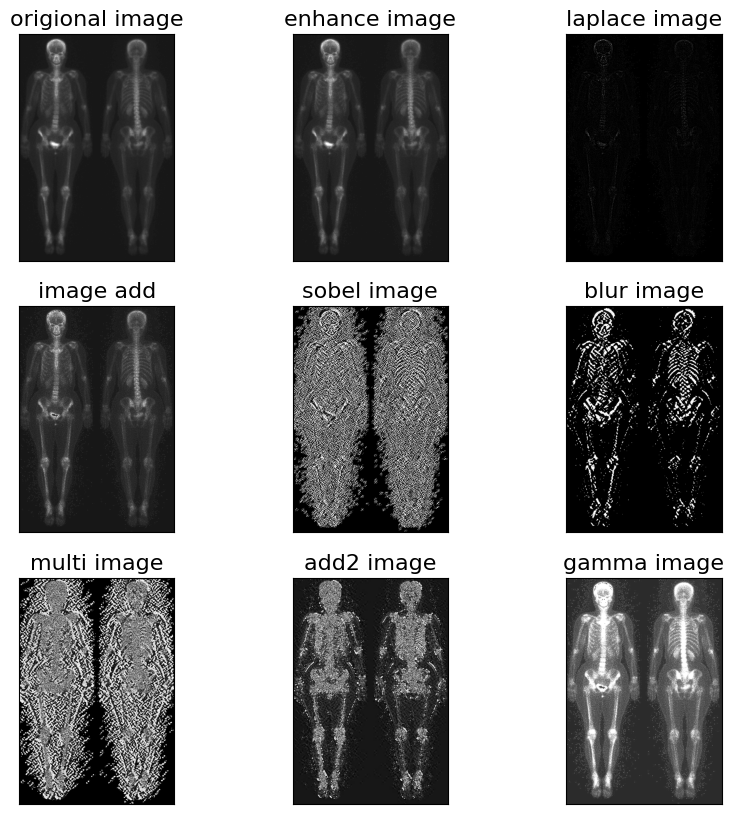

In [1]:
import numpy as np
import cv2
import os
from torchvision import transforms
import glob
import  matplotlib.pyplot as plt

# 图像的二阶微分

img = cv2.imread('bone-scan.png')

laplace_kernel = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

laplace_kernel_2 = np.array([[0,-1,0],
                           [-1,4,-1],
                           [0,-1,0]])
# 拉普拉斯滤波
img_laplace = cv2.filter2D(src=img,ddepth=-1,kernel=laplace_kernel)
img_enhance = img+0.2*img_laplace
# 区间限定
img_enhance[img_enhance>255]=255
img_enhance[img_enhance<0]=0
cv2.normalize(img_laplace,None,0.0,1.0,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
cv2.normalize(img_enhance,None,0.0,1.0,cv2.NORM_MINMAX,dtype=cv2.CV_32F)

# sobel 处理
img_sobel = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
# 5*5 均值滤波
img_blur=cv2.blur(img_sobel,(5,5))
# 图像相加
img_add = img+img_laplace
# 图像相乘
img_multi = img_add * img_blur
# 图像累加
img_add2 = img+img_multi
def gamma_transformation(input_image, c, gamma):
    input_image_cp = np.copy(input_image)  # 输入图像的副本
    output_imgae = c * np.power(input_image_cp, gamma) # 输出图像
    return output_imgae
# gamma 图像
img_gamm = gamma_transformation(img_add,1,1.2)
# 防止溢出
img_gamm[img_gamm>255]=255
img_gamm[img_gamm<0]=0
img_list = [img,img_enhance,img_laplace,img_add,img_sobel,img_blur,img_multi,img_add2,img_gamm]
img_title = ['origional image','enhance image','laplace image','image add','sobel image','blur image','multi image','add2 image','gamma image']

def draw_image(row,col,img_list,title_list):
    plt.figure(figsize=(10,10))
    for i in range(col*row):
        plt.subplot(row,col,i+1)
        plt.imshow(img_list[i].astype(np.uint8))
        plt.title(title_list[i],fontsize=16)
        plt.xticks([]),plt.yticks([])
draw_image(3,3,img_list,img_title)